In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [0]:
data=pd.read_csv('/content/drive/My Drive/creditcard.csv')

A brief description of the dataset

Time: Number of seconds elapsed between this transaction and the first transaction in the dataset
Amount: Transaction amount
Class: 1 for fraudulent transactions, 0 otherwise


In [3]:
data.shape

(284807, 31)

In [4]:
data.isnull().values.any()

False

In [5]:
data  #original data 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data Pre-processing and Visualization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


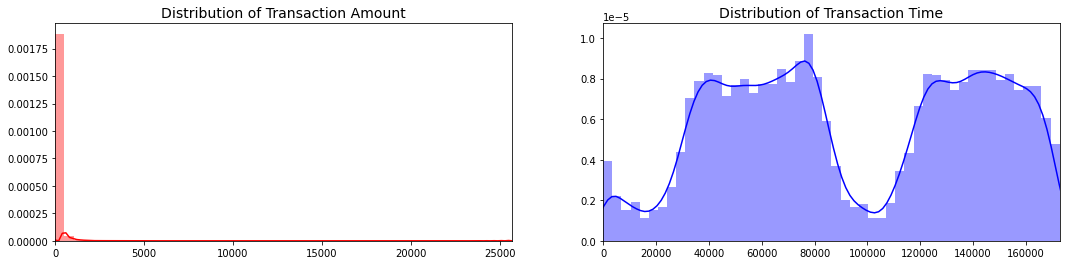

In [7]:
from matplotlib import  pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [0]:
non_fraud=data[data['Class']==0]
fraud=data[data['Class']==1]

In [9]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [0]:
#Scaling of data- Time and amount values need to be scaled wrt other values to have same distributions
#one way to do this is to first scale time and amount (normalization) then applying SMOTE on them to correct the imbalance distribution. 
#Scaling the data- use robust scaler -  Because it is less prone to outliers


In [11]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [0]:
from sklearn.preprocessing import StandardScaler
rob_scaler=StandardScaler()
non_fraud=data[data['Class']==0].sample(1000)
fraud=data[data['Class']==1]
df1 = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
df1['Amount'] = rob_scaler.fit_transform(df1['Amount'].values.reshape(-1,1))

In [13]:
X=df1.drop(['Class'],axis=1).values
labels=df1['Class'].values
print(pd.DataFrame(X))
print(pd.DataFrame(labels))

            0         1         2   ...        27        28        29
0     134209.0 -0.070951  0.782526  ...  0.109005  0.068052 -0.346988
1      65355.0  1.106344  0.058331  ...  0.041076  0.008504 -0.346988
2     139705.0  2.066287 -1.813822  ... -0.004027 -0.045389  0.009086
3      36095.0 -2.569341  2.616216  ... -0.924555  0.069069 -0.350130
4      52814.0 -1.101847 -1.632441  ... -0.336072 -0.177587  1.313683
...        ...       ...       ...  ...       ...       ...       ...
1487  141470.0  2.006152  0.094678  ... -0.025449 -0.077502 -0.314058
1488  157378.0  2.132873 -0.080671  ... -0.016626 -0.069177 -0.345064
1489  135095.0  0.232512  0.938944  ...  0.180859 -0.029315  0.752880
1490   29841.0 -0.923976  0.900946  ...  0.180547  0.051801 -0.237905
1491   41204.0 -8.440284  6.147653  ...  0.792691  0.067790 -0.256310

[1492 rows x 30 columns]
      0
0     0
1     0
2     0
3     0
4     1
...  ..
1487  0
1488  0
1489  1
1490  0
1491  1

[1492 rows x 1 columns]


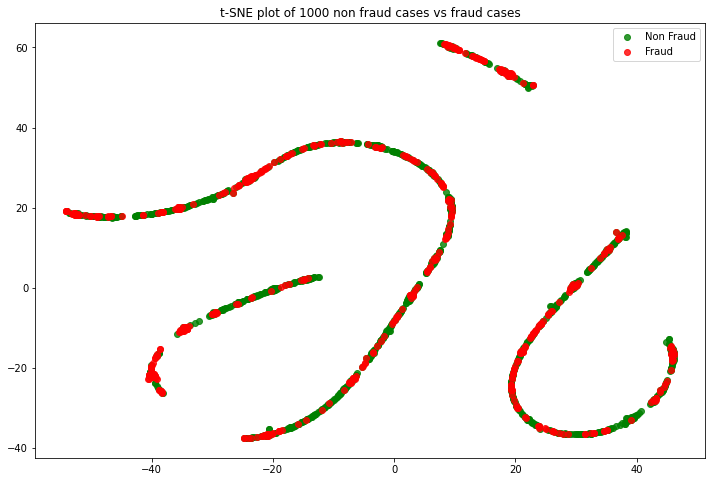

In [14]:
from sklearn.manifold import TSNE
'''What is t-SNE? t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised,
 non-linear technique primarily used for data exploration and visualizing high-dimensional data. 
 In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space'''

def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.title('t-SNE plot of 1000 non fraud cases vs fraud cases')
    plt.show()


tsne_plot(X,labels)    



In [0]:
#Train Test Split 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
datacopy=data.copy()
labels=datacopy['Class']
datacopy=datacopy.drop(['Class','Time'],axis=1)
#datacopy=datacopy.drop(['Time'],axis=1)
datacopy['Amount']=scaler.fit_transform(datacopy['Amount'].values.reshape(-1,1))
#datacopy['Time']=scaler.fit_transform(datacopy['Time'].values.reshape(-1,1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(datacopy,labels, test_size=0.2,random_state=42)

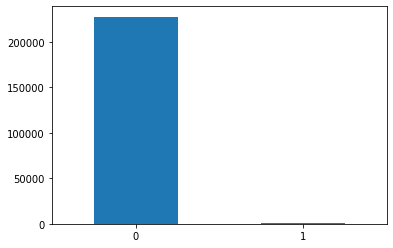

In [16]:
count_classes=pd.value_counts(y_train, sort = True)
count_classes.plot(kind = 'bar', rot=1)

SMOTE Oversampling

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='not majority',random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Addition of Gaussian noise

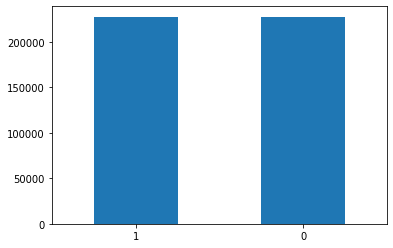

In [18]:
count_classes1=pd.value_counts(y_train_res, sort = True)
count_classes1.plot(kind = 'bar', rot=1)

In [0]:
X_train_noisy = X_train_res +  np.random.normal(loc=0.0, scale=0.1, size=X_train_res.shape)

In [20]:
pd.DataFrame(X_train_noisy)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.951195,-0.414002,-0.331091,0.284508,-0.668964,-0.007947,-0.727215,0.013025,1.283705,-0.009254,0.676237,1.732801,1.247312,-0.219176,-0.364128,0.242889,-0.883636,0.791777,0.269264,-0.017540,0.060099,0.959513,-0.043278,-0.347194,-0.023172,-0.030749,0.046829,0.037000,-0.259604
1,-0.444566,-0.658889,1.360436,-2.053067,-0.131942,0.313732,0.025184,-0.520900,0.021156,0.507771,-1.960329,-0.863261,1.070823,-1.194129,0.579644,-0.122581,-1.733312,2.140340,-1.719059,-0.552768,-0.270329,0.409568,0.044877,-0.978503,-1.287927,0.357164,-0.279377,-0.143039,-0.026333
2,0.220202,0.612429,-0.583834,-0.581842,0.968275,-0.387514,0.919023,0.090065,0.067372,-0.593447,0.467463,-0.102485,-0.982099,-0.670997,-0.726923,0.501902,0.049529,0.481157,0.062214,-0.052826,-0.248336,-0.786413,0.067759,-0.034929,-0.512577,0.261707,0.012834,-0.054587,-0.251608
3,-0.616461,0.991862,1.767057,2.659367,0.477602,0.947449,0.819783,-0.000702,0.336482,0.525768,-0.836510,-4.176115,0.299361,1.333929,-1.075300,1.431057,-0.538874,0.688545,-2.391154,-0.287250,0.136541,0.461388,-0.100033,0.472597,-0.796960,-0.347974,-0.161910,-0.047789,0.134389
4,-4.107369,1.885009,-0.447058,-0.158883,-0.747270,-0.453689,-0.478102,1.328209,0.653233,1.257938,0.401309,1.513110,0.756555,0.320686,-1.109897,0.035422,0.105902,0.066522,0.719803,-0.033526,-0.628212,-0.215968,0.289763,-0.015796,0.432767,0.122228,0.283449,-0.213729,-0.312417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,-0.783029,3.649268,-3.806463,6.002073,0.051558,-0.189571,-3.223110,-4.387431,-3.845339,-3.073869,1.746465,-4.119560,0.483062,-4.630551,0.095658,-2.544304,-2.441395,-0.723349,0.957185,1.792455,-1.573564,1.278188,-0.191245,-0.358538,0.500479,0.680521,0.580168,0.507901,-0.403726
454898,-3.808440,2.963680,-0.953171,3.118284,-1.772740,0.266673,-0.668426,-3.027622,2.450009,0.556971,3.040611,-7.077598,0.756010,-5.431670,-0.719389,-2.834657,-5.048824,-1.717355,-0.754876,-0.633781,1.387554,-0.101057,0.239009,0.487171,-0.373849,-0.398913,-2.526019,-0.497798,0.375172
454899,0.701807,3.114328,-5.942019,5.707491,1.588656,-2.067840,-0.948647,0.172410,-3.352822,-4.341593,4.908104,-5.086757,-1.989813,-10.275538,-0.486649,0.115054,0.327684,1.382581,-1.790889,0.331621,0.305876,-0.752238,-0.195174,-0.179115,0.743470,0.320143,0.560628,0.399155,-0.575023
454900,-1.361812,2.241358,-1.860883,3.383969,-2.080460,-0.302971,-2.553823,1.340135,-2.180474,-2.799317,1.671532,-4.367838,-0.933615,-3.695312,1.356651,-2.755301,-5.840932,-0.888557,1.914787,0.258108,0.276016,0.479403,-0.090577,-0.583030,-0.085832,0.094794,0.443952,0.236697,-0.033698


In [21]:
pd.DataFrame(X_train_res)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.313289
1,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.169717
2,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.305292
3,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.116306
4,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.250239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,-0.760227,3.654058,-3.725693,6.163114,0.040322,-0.078825,-3.161659,-4.485853,-3.776935,-2.936777,1.715166,-4.165881,0.501580,-4.621487,0.169584,-2.516687,-2.495557,-0.898612,0.828977,1.706957,-1.649400,1.407536,-0.095050,-0.337452,0.528813,0.742048,0.541991,0.511164,-0.323694
454898,-3.833728,2.925455,-1.080105,3.142423,-1.762056,0.268539,-0.756497,-2.901069,2.420730,0.682836,3.036219,-6.946230,0.761568,-5.599284,-0.877552,-2.971388,-5.010350,-1.835478,-0.750351,-0.518573,1.429330,-0.190480,0.190984,0.405361,-0.460762,-0.427227,-2.633981,-0.568143,0.396583
454899,0.812121,3.257529,-6.019000,5.651897,1.585227,-2.019294,-0.931780,0.344464,-3.284825,-4.152917,4.906197,-5.183450,-2.124542,-10.160221,-0.352595,0.055677,0.278448,1.360654,-1.860811,0.276138,0.215702,-0.683508,-0.261679,-0.215876,0.765407,0.267948,0.507789,0.355727,-0.352124
454900,-1.241345,2.198029,-1.963282,3.459911,-2.019362,-0.175228,-2.634090,1.306220,-2.146353,-2.857719,1.509938,-4.488289,-0.866443,-3.673264,1.304609,-2.761928,-5.899537,-0.973965,1.881065,0.297891,0.704664,0.367963,-0.062090,-0.536891,-0.295948,0.103475,0.415134,0.156060,0.020756


In [0]:
def change_batch_y(batch_y):
  batch_y = batch_y
  batch_y = np.array([batch_y == 0, batch_y == 1], dtype=np.float32)
  batch_y = np.transpose(batch_y)
  return batch_y

In [23]:
import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
input_layer = Input(shape=(X_train_noisy.shape[1],))
func=keras.layers.LeakyReLU(alpha=0.1)
encoded = Dense(22, activation=func, activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded2 = Dense(15, activation =func, activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded3= Dense(10, activation =func, activity_regularizer=regularizers.l1(10e-5))(encoded2)
decoded1= Dense(15, activation =func, activity_regularizer=regularizers.l1(10e-5))(encoded3)
decoded2= Dense(22, activation =func, activity_regularizer=regularizers.l1(10e-5))(decoded1)
output=  Dense(X_train_noisy.shape[1], activation =func, activity_regularizer=regularizers.l1(10e-5))(decoded2)
autoencoder = Model(input_layer, output)
adam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
autoencoder.compile(optimizer=adam, loss="mse")
autoencoder.summary()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 29)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 22)                660       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                345       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_5 (Dense)              (None, 22)                352       
_________________________________________________________________
dense_6 (Dense)              (None, 29)                667 

In [24]:
pd.DataFrame(X_train_noisy)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.951195,-0.414002,-0.331091,0.284508,-0.668964,-0.007947,-0.727215,0.013025,1.283705,-0.009254,0.676237,1.732801,1.247312,-0.219176,-0.364128,0.242889,-0.883636,0.791777,0.269264,-0.017540,0.060099,0.959513,-0.043278,-0.347194,-0.023172,-0.030749,0.046829,0.037000,-0.259604
1,-0.444566,-0.658889,1.360436,-2.053067,-0.131942,0.313732,0.025184,-0.520900,0.021156,0.507771,-1.960329,-0.863261,1.070823,-1.194129,0.579644,-0.122581,-1.733312,2.140340,-1.719059,-0.552768,-0.270329,0.409568,0.044877,-0.978503,-1.287927,0.357164,-0.279377,-0.143039,-0.026333
2,0.220202,0.612429,-0.583834,-0.581842,0.968275,-0.387514,0.919023,0.090065,0.067372,-0.593447,0.467463,-0.102485,-0.982099,-0.670997,-0.726923,0.501902,0.049529,0.481157,0.062214,-0.052826,-0.248336,-0.786413,0.067759,-0.034929,-0.512577,0.261707,0.012834,-0.054587,-0.251608
3,-0.616461,0.991862,1.767057,2.659367,0.477602,0.947449,0.819783,-0.000702,0.336482,0.525768,-0.836510,-4.176115,0.299361,1.333929,-1.075300,1.431057,-0.538874,0.688545,-2.391154,-0.287250,0.136541,0.461388,-0.100033,0.472597,-0.796960,-0.347974,-0.161910,-0.047789,0.134389
4,-4.107369,1.885009,-0.447058,-0.158883,-0.747270,-0.453689,-0.478102,1.328209,0.653233,1.257938,0.401309,1.513110,0.756555,0.320686,-1.109897,0.035422,0.105902,0.066522,0.719803,-0.033526,-0.628212,-0.215968,0.289763,-0.015796,0.432767,0.122228,0.283449,-0.213729,-0.312417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,-0.783029,3.649268,-3.806463,6.002073,0.051558,-0.189571,-3.223110,-4.387431,-3.845339,-3.073869,1.746465,-4.119560,0.483062,-4.630551,0.095658,-2.544304,-2.441395,-0.723349,0.957185,1.792455,-1.573564,1.278188,-0.191245,-0.358538,0.500479,0.680521,0.580168,0.507901,-0.403726
454898,-3.808440,2.963680,-0.953171,3.118284,-1.772740,0.266673,-0.668426,-3.027622,2.450009,0.556971,3.040611,-7.077598,0.756010,-5.431670,-0.719389,-2.834657,-5.048824,-1.717355,-0.754876,-0.633781,1.387554,-0.101057,0.239009,0.487171,-0.373849,-0.398913,-2.526019,-0.497798,0.375172
454899,0.701807,3.114328,-5.942019,5.707491,1.588656,-2.067840,-0.948647,0.172410,-3.352822,-4.341593,4.908104,-5.086757,-1.989813,-10.275538,-0.486649,0.115054,0.327684,1.382581,-1.790889,0.331621,0.305876,-0.752238,-0.195174,-0.179115,0.743470,0.320143,0.560628,0.399155,-0.575023
454900,-1.361812,2.241358,-1.860883,3.383969,-2.080460,-0.302971,-2.553823,1.340135,-2.180474,-2.799317,1.671532,-4.367838,-0.933615,-3.695312,1.356651,-2.755301,-5.840932,-0.888557,1.914787,0.258108,0.276016,0.479403,-0.090577,-0.583030,-0.085832,0.094794,0.443952,0.236697,-0.033698


In [25]:
X_train_noisy.shape

(454902, 29)

In [26]:
autoencoder.fit(X_train_noisy, X_train_res, 
                batch_size =64, epochs = 30, 
                shuffle = True, validation_split = 0.20,);

Train on 363921 samples, validate on 90981 samples
Epoch 1/30
363921/363921 [==============================] - 32s 89us/step - loss: 1.9298 - val_loss: 1.7948
Epoch 2/30
363921/363921 [==============================] - 31s 84us/step - loss: 1.0807 - val_loss: 1.4783
Epoch 3/30
363921/363921 [==============================] - 30s 84us/step - loss: 0.9550 - val_loss: 1.3487
Epoch 4/30
363921/363921 [==============================] - 30s 84us/step - loss: 0.8907 - val_loss: 1.2709
Epoch 5/30
363921/363921 [==============================] - 30s 84us/step - loss: 0.8473 - val_loss: 1.1865
Epoch 6/30
363921/363921 [==============================] - 30s 83us/step - loss: 0.8198 - val_loss: 1.1541
Epoch 7/30
363921/363921 [==============================] - 30s 83us/step - loss: 0.8025 - val_loss: 1.1217
Epoch 8/30
363921/363921 [==============================] - 30s 83us/step - loss: 0.7823 - val_loss: 1.1012
Epoch 9/30
363921/363921 [==============================] - 31s 85us/step - loss: 0.7

In [0]:
#from keras.models import load_model
#autoencoder.save('Autoencoder with 100 ep.h5')

In [0]:
denoised_dataset=autoencoder.predict(X_train_noisy)

In [29]:
pd.DataFrame(denoised_dataset)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.838647,-0.089085,-0.148193,0.145194,-0.195758,-0.074809,-0.410919,-0.009343,0.968347,-0.002879,0.101092,1.164684,-0.061168,-0.012410,0.103034,-0.010301,-0.096074,-0.006119,-0.056797,-0.052008,-0.013732,-0.027115,-0.045295,-0.029871,0.021425,-0.009740,-0.027104,-0.017096,-0.064204
1,-0.804016,-0.642585,0.855550,-1.877310,-0.201887,-0.081289,-0.011300,0.240194,-0.175048,-0.184081,-0.039494,-0.194450,-0.036868,-0.051744,-0.134513,-0.111709,-0.073064,0.726686,-0.136967,-0.023010,-0.011085,-0.021366,-0.030690,-0.005309,-0.030396,-0.012926,-0.060068,-0.054066,-0.055466
2,-0.102612,0.802555,-0.288212,-0.429438,0.376191,-0.286376,0.514781,-0.014450,-0.260993,-0.293719,-0.007457,-0.150638,-0.056613,-0.413007,0.271820,-0.007183,0.019256,0.291038,-0.049017,-0.016326,-0.012837,-0.001161,-0.020751,-0.048298,-0.027956,-0.007014,-0.036975,-0.018348,-0.056766
3,-0.742003,1.125629,1.546384,2.228029,-0.127911,0.314595,-0.505877,-0.630307,0.791625,-0.104073,0.789705,-1.636265,1.173989,0.689196,-0.071286,-0.285286,0.594832,-0.000318,0.109815,-0.073212,-0.154718,-0.036528,0.187903,-0.040833,-0.006450,0.057133,-0.060584,-0.000681,-0.066677
4,-3.575869,1.966810,-1.259948,-0.525461,-0.905968,-0.090708,-0.259534,1.414543,0.375160,1.607794,-0.030435,0.162476,-0.071991,-0.022100,-0.048370,0.182055,-0.035423,-0.057796,-0.015978,-0.033142,-0.055264,-0.219042,-0.069636,0.031302,0.248086,-0.010603,-0.045660,-0.003355,-0.100491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,-1.281145,3.794178,-3.117554,5.823969,-0.201547,-0.387935,-3.018318,-3.305925,-1.898818,-3.273575,1.841398,-3.233061,-0.352560,-4.343910,-0.352108,-1.500335,-2.114587,-0.706057,-0.211909,1.900242,-1.712661,-0.014328,-0.006135,-0.129309,-0.176691,-0.052774,-0.683627,-0.052474,-0.012600
454898,-3.854979,2.956724,-1.355769,3.533203,-0.330274,1.560600,-1.922809,-2.335202,2.180308,-1.518228,3.227364,-6.302608,0.213773,-5.013812,-0.167666,-3.549871,-4.432371,-1.487920,-0.109438,-0.402046,-0.024644,-0.428718,-0.033045,-0.135685,-0.035485,-0.033889,-0.169831,-0.003976,-0.137381
454899,0.474251,3.141345,-5.857825,5.426497,1.734112,-2.347399,-0.918784,-0.070849,-3.237815,-4.196364,4.022527,-4.453131,-0.517183,-10.413074,-0.228592,-0.454691,-0.122518,1.338197,-0.835350,0.143854,0.003270,-0.323476,-0.178208,-0.342844,0.668522,0.204365,0.389212,0.142069,-0.089985
454900,-1.260161,1.900003,-1.859262,3.154094,-1.724633,-0.625215,-2.325327,1.173406,-1.439846,-3.074908,1.969128,-3.459864,0.054412,-3.869408,0.528963,-3.019786,-5.364001,-1.850077,1.491673,0.350081,0.720645,-0.003760,-0.033145,-0.020526,-0.014092,-0.000242,0.188175,0.063745,0.000497


In [30]:
pd.DataFrame(X_train_res)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.313289
1,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.169717
2,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.305292
3,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.116306
4,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.250239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,-0.760227,3.654058,-3.725693,6.163114,0.040322,-0.078825,-3.161659,-4.485853,-3.776935,-2.936777,1.715166,-4.165881,0.501580,-4.621487,0.169584,-2.516687,-2.495557,-0.898612,0.828977,1.706957,-1.649400,1.407536,-0.095050,-0.337452,0.528813,0.742048,0.541991,0.511164,-0.323694
454898,-3.833728,2.925455,-1.080105,3.142423,-1.762056,0.268539,-0.756497,-2.901069,2.420730,0.682836,3.036219,-6.946230,0.761568,-5.599284,-0.877552,-2.971388,-5.010350,-1.835478,-0.750351,-0.518573,1.429330,-0.190480,0.190984,0.405361,-0.460762,-0.427227,-2.633981,-0.568143,0.396583
454899,0.812121,3.257529,-6.019000,5.651897,1.585227,-2.019294,-0.931780,0.344464,-3.284825,-4.152917,4.906197,-5.183450,-2.124542,-10.160221,-0.352595,0.055677,0.278448,1.360654,-1.860811,0.276138,0.215702,-0.683508,-0.261679,-0.215876,0.765407,0.267948,0.507789,0.355727,-0.352124
454900,-1.241345,2.198029,-1.963282,3.459911,-2.019362,-0.175228,-2.634090,1.306220,-2.146353,-2.857719,1.509938,-4.488289,-0.866443,-3.673264,1.304609,-2.761928,-5.899537,-0.973965,1.881065,0.297891,0.704664,0.367963,-0.062090,-0.536891,-0.295948,0.103475,0.415134,0.156060,0.020756


In [31]:
pd.DataFrame(denoised_dataset)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.838647,-0.089085,-0.148193,0.145194,-0.195758,-0.074809,-0.410919,-0.009343,0.968347,-0.002879,0.101092,1.164684,-0.061168,-0.012410,0.103034,-0.010301,-0.096074,-0.006119,-0.056797,-0.052008,-0.013732,-0.027115,-0.045295,-0.029871,0.021425,-0.009740,-0.027104,-0.017096,-0.064204
1,-0.804016,-0.642585,0.855550,-1.877310,-0.201887,-0.081289,-0.011300,0.240194,-0.175048,-0.184081,-0.039494,-0.194450,-0.036868,-0.051744,-0.134513,-0.111709,-0.073064,0.726686,-0.136967,-0.023010,-0.011085,-0.021366,-0.030690,-0.005309,-0.030396,-0.012926,-0.060068,-0.054066,-0.055466
2,-0.102612,0.802555,-0.288212,-0.429438,0.376191,-0.286376,0.514781,-0.014450,-0.260993,-0.293719,-0.007457,-0.150638,-0.056613,-0.413007,0.271820,-0.007183,0.019256,0.291038,-0.049017,-0.016326,-0.012837,-0.001161,-0.020751,-0.048298,-0.027956,-0.007014,-0.036975,-0.018348,-0.056766
3,-0.742003,1.125629,1.546384,2.228029,-0.127911,0.314595,-0.505877,-0.630307,0.791625,-0.104073,0.789705,-1.636265,1.173989,0.689196,-0.071286,-0.285286,0.594832,-0.000318,0.109815,-0.073212,-0.154718,-0.036528,0.187903,-0.040833,-0.006450,0.057133,-0.060584,-0.000681,-0.066677
4,-3.575869,1.966810,-1.259948,-0.525461,-0.905968,-0.090708,-0.259534,1.414543,0.375160,1.607794,-0.030435,0.162476,-0.071991,-0.022100,-0.048370,0.182055,-0.035423,-0.057796,-0.015978,-0.033142,-0.055264,-0.219042,-0.069636,0.031302,0.248086,-0.010603,-0.045660,-0.003355,-0.100491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,-1.281145,3.794178,-3.117554,5.823969,-0.201547,-0.387935,-3.018318,-3.305925,-1.898818,-3.273575,1.841398,-3.233061,-0.352560,-4.343910,-0.352108,-1.500335,-2.114587,-0.706057,-0.211909,1.900242,-1.712661,-0.014328,-0.006135,-0.129309,-0.176691,-0.052774,-0.683627,-0.052474,-0.012600
454898,-3.854979,2.956724,-1.355769,3.533203,-0.330274,1.560600,-1.922809,-2.335202,2.180308,-1.518228,3.227364,-6.302608,0.213773,-5.013812,-0.167666,-3.549871,-4.432371,-1.487920,-0.109438,-0.402046,-0.024644,-0.428718,-0.033045,-0.135685,-0.035485,-0.033889,-0.169831,-0.003976,-0.137381
454899,0.474251,3.141345,-5.857825,5.426497,1.734112,-2.347399,-0.918784,-0.070849,-3.237815,-4.196364,4.022527,-4.453131,-0.517183,-10.413074,-0.228592,-0.454691,-0.122518,1.338197,-0.835350,0.143854,0.003270,-0.323476,-0.178208,-0.342844,0.668522,0.204365,0.389212,0.142069,-0.089985
454900,-1.260161,1.900003,-1.859262,3.154094,-1.724633,-0.625215,-2.325327,1.173406,-1.439846,-3.074908,1.969128,-3.459864,0.054412,-3.869408,0.528963,-3.019786,-5.364001,-1.850077,1.491673,0.350081,0.720645,-0.003760,-0.033145,-0.020526,-0.014092,-0.000242,0.188175,0.063745,0.000497


In [32]:
pd.DataFrame(X_train_res)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.313289
1,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.169717
2,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.305292
3,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.116306
4,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.250239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,-0.760227,3.654058,-3.725693,6.163114,0.040322,-0.078825,-3.161659,-4.485853,-3.776935,-2.936777,1.715166,-4.165881,0.501580,-4.621487,0.169584,-2.516687,-2.495557,-0.898612,0.828977,1.706957,-1.649400,1.407536,-0.095050,-0.337452,0.528813,0.742048,0.541991,0.511164,-0.323694
454898,-3.833728,2.925455,-1.080105,3.142423,-1.762056,0.268539,-0.756497,-2.901069,2.420730,0.682836,3.036219,-6.946230,0.761568,-5.599284,-0.877552,-2.971388,-5.010350,-1.835478,-0.750351,-0.518573,1.429330,-0.190480,0.190984,0.405361,-0.460762,-0.427227,-2.633981,-0.568143,0.396583
454899,0.812121,3.257529,-6.019000,5.651897,1.585227,-2.019294,-0.931780,0.344464,-3.284825,-4.152917,4.906197,-5.183450,-2.124542,-10.160221,-0.352595,0.055677,0.278448,1.360654,-1.860811,0.276138,0.215702,-0.683508,-0.261679,-0.215876,0.765407,0.267948,0.507789,0.355727,-0.352124
454900,-1.241345,2.198029,-1.963282,3.459911,-2.019362,-0.175228,-2.634090,1.306220,-2.146353,-2.857719,1.509938,-4.488289,-0.866443,-3.673264,1.304609,-2.761928,-5.899537,-0.973965,1.881065,0.297891,0.704664,0.367963,-0.062090,-0.536891,-0.295948,0.103475,0.415134,0.156060,0.020756


In [33]:
#classifier 

#get number of columns in training data
n_cols = 29
input_layer_1=Input(shape=(29,))
#add model 
func=keras.layers.LeakyReLU(alpha=0.1)
layer1 = Dense(22, activation=func, activity_regularizer=regularizers.l1(10e-5))(input_layer_1)
layer2 = Dense(15, activation =func, activity_regularizer=regularizers.l1(10e-5))(layer1)
layer3= Dense(10, activation =func, activity_regularizer=regularizers.l1(10e-5))(layer2)
layer4= Dense(5, activation =func, activity_regularizer=regularizers.l1(10e-5))(layer3)
output_layer= Dense(2, activation ='softmax')(layer4)
#output=  Dense(X_train_noisy.shape[1], activation ='tanh', activity_regularizer=regularizers.l1(10e-5))(decoded2)
classifier= Model(input_layer_1, output_layer)
classifier.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [34]:
classifier.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 29)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 22)                660       
_________________________________________________________________
dense_8 (Dense)              (None, 15)                345       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 12        
Total params: 1,232
Trainable params: 1,232
Non-trainable params: 0
_________________________________________________________

In [35]:
change=change_batch_y(y_train_res)
classifier.fit(denoised_dataset, change, 
                batch_size =64, epochs = 30, 
                shuffle = True, validation_split = 0.20)

Train on 363921 samples, validate on 90981 samples
Epoch 1/30
363921/363921 [==============================] - 32s 87us/step - loss: 0.1403 - accuracy: 0.9693 - val_loss: 0.1007 - val_accuracy: 0.9793
Epoch 2/30
363921/363921 [==============================] - 32s 87us/step - loss: 0.0861 - accuracy: 0.9798 - val_loss: 0.1073 - val_accuracy: 0.9713
Epoch 3/30
363921/363921 [==============================] - 32s 87us/step - loss: 0.0765 - accuracy: 0.9818 - val_loss: 0.1114 - val_accuracy: 0.9732
Epoch 4/30
363921/363921 [==============================] - 31s 86us/step - loss: 0.0716 - accuracy: 0.9831 - val_loss: 0.0904 - val_accuracy: 0.9791
Epoch 5/30
363921/363921 [==============================] - 31s 86us/step - loss: 0.0690 - accuracy: 0.9836 - val_loss: 0.0959 - val_accuracy: 0.9752
Epoch 6/30
363921/363921 [==============================] - 31s 86us/step - loss: 0.0669 - accuracy: 0.9840 - val_loss: 0.0794 - val_accuracy: 0.9814
Epoch 7/30
363921/363921 [=======================

In [0]:
from sklearn.metrics import classification_report, accuracy_score
y_test_pred=classifier.predict(autoencoder.predict(X_test))
y_test_pred_max=np.argmax(y_test_pred, axis=-1)

Recall metric in the testing dataset:  0.8775510204081632


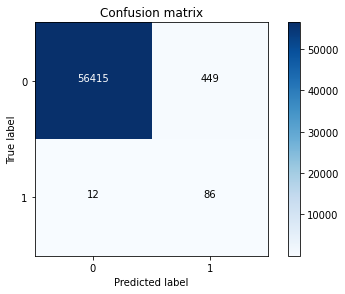

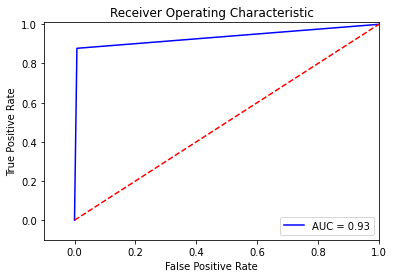

In [37]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,recall_score,auc,accuracy_score
cnf_matrix = confusion_matrix(y_test,y_test_pred_max)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()    

fpr, tpr, thresholds = roc_curve(y_test,y_test_pred_max)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
#print(classification_report(y_test_pred,y_test))
print ("Accuracy Score: ", accuracy_score(y_test,y_test_pred_max))

Accuracy Score:  0.991906885291949


In [0]:
y_test_change=change_batch_y(y_test)

In [40]:
evaluate_results = []
for threshold in np.arange(0, 1.01, 0.01):
  TP, FN, FP, TN = 0, 0, 0, 0
  for i in range(len(y_test)):
      prediction = y_test_pred[i]
      actual = y_test_change[i]
      if prediction[1] >= threshold and actual[1] == 1:
          TP += 1
      elif prediction[1] >= threshold and actual[1] == 0:
          FP += 1
      elif prediction[1] < threshold and actual[1] == 1:
          FN += 1
      elif prediction[1] < threshold and actual[1] == 0:
          TN += 1
  result = dict()
  result['threshold'] = threshold
  result['TP'] = TP
  result['FP'] = FP
  result['FN'] = FN
  result['TN'] = TN
  result['recall'] = TP / (TP + FN)
  result['precision'] = TP / (TP + FP)
  result['accuracy'] = (TP + TN) / (TP + FN + FP + TN)
  evaluate_results.append(result)
  print(result)

{'threshold': 0.0, 'TP': 98, 'FP': 56864, 'FN': 0, 'TN': 0, 'recall': 1.0, 'precision': 0.0017204452090867595, 'accuracy': 0.0017204452090867595}
{'threshold': 0.01, 'TP': 90, 'FP': 3524, 'FN': 8, 'TN': 53340, 'recall': 0.9183673469387755, 'precision': 0.024903154399557276, 'accuracy': 0.9379937502194445}
{'threshold': 0.02, 'TP': 90, 'FP': 2829, 'FN': 8, 'TN': 54035, 'recall': 0.9183673469387755, 'precision': 0.030832476875642344, 'accuracy': 0.9501948667532741}
{'threshold': 0.03, 'TP': 90, 'FP': 2517, 'FN': 8, 'TN': 54347, 'recall': 0.9183673469387755, 'precision': 0.03452243958573072, 'accuracy': 0.955672202520979}
{'threshold': 0.04, 'TP': 90, 'FP': 2236, 'FN': 8, 'TN': 54628, 'recall': 0.9183673469387755, 'precision': 0.03869303525365434, 'accuracy': 0.9606053158245849}
{'threshold': 0.05, 'TP': 90, 'FP': 2016, 'FN': 8, 'TN': 54848, 'recall': 0.9183673469387755, 'precision': 0.042735042735042736, 'accuracy': 0.964467539763351}
{'threshold': 0.06, 'TP': 89, 'FP': 1856, 'FN': 9, 'T

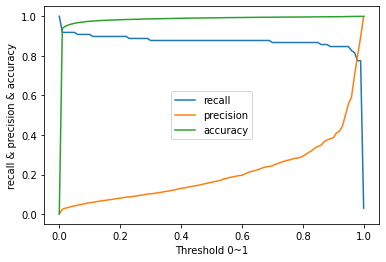

In [41]:
threshold_array = [result['threshold'] for result in evaluate_results]
recall_array = [result['recall'] for result in evaluate_results]
precision_array = [result['precision'] for result in evaluate_results]
accuracy_array = [result['accuracy'] for result in evaluate_results]
plt.plot(threshold_array, recall_array, label='recall')
plt.plot(threshold_array, precision_array, label='precision')
plt.plot(threshold_array, accuracy_array, label='accuracy')
plt.xlabel('Threshold 0~1')
plt.ylabel('recall & precision & accuracy')
plt.legend()
plt.show()